# Latar Belakang
Departemen Kepolisian Boston (BPD) merekam dan membuat laporan insiden kejahatan disediakan untuk mendokumentasikan detail awal seputar insiden yang ditanggapi oleh petugas BPD. Dengan data ini diharapkan kepolisian dapat meningkatkan kinerja di suatu wilayah di boston untuk menekan angka kejahatan.

## Pernyataan Masalah
BPD ingin mengetahui daerah mana saja di boston yang memiliki kasus kejahatan narkoba paling banyak selama periode 2015 - 2018 ?


# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data kejahatan di Boston yang sudah didokumentasikan oleh BPD. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/AnalyzeBoston/crimes-in-boston). 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Capstone 2/crime.csv"
df = pd.read_csv(path, encoding='windows-1252')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df.head(5)

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0  I182070945      619           Larceny               LARCENY ALL OTHERS     
1  I182070943      1402          Vandalism             VANDALISM              
2  I182070941      3410          Towed                 TOWED MOTOR VEHICLE    
3  I182070940      3114          Investigate Property  INVESTIGATE PROPERTY   
4  I182070938      3114          Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0  D14      808            NaN      2018-09-02 13:00:00  2018  9       
1  C11      347            NaN      2018-08-21 00:00:00  2018  8       
2  D4       151            NaN      2018-09-03 19:27:00  2018  9       
3  D4       272            NaN      2018-09-03 21:16:00  2018  9       
4  B3       421            NaN      2018-09-03 21:05:00  2018  9       

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0  Sunday      13    Part One    LINCOLN ST   42.357791 -71.139371   
1  Tuesday     0     Part Two    HECLA ST     42.306821 -71.060300   
2  Monday      19    Part Three  CAZENOVE ST  42.346589 -71.072429   
3  Monday      21    Part Three  NEWCOMB ST   42.334182 -71.078664   
4  Monday      21    Part Three  DELHI ST     42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

In [31]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (319073, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat        

In [32]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

<ipython-input-32-fdc177cd8068>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Column Name  Number of Unique  \
0   INCIDENT_NUMBER      282517             
1   OFFENSE_CODE         222                
2   OFFENSE_CODE_GROUP   67                 
3   OFFENSE_DESCRIPTION  244                
4   DISTRICT             12                 
5   REPORTING_AREA       879                
6   SHOOTING             1                  
7   OCCURRED_ON_DATE     233229             
8   YEAR                 4                  
9   MONTH                12                 
10  DAY_OF_WEEK          7                  
11  HOUR                 24                 
12  UCR_PART             4                  
13  STREET               4657               
14  Lat                  18178              
15  Long                 18178              
16  Location             18194              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unique Sample  
0   [I182070945, I182070943, I182070941, I182070940, I182070938, I182070936, I182070933, I182070932, I182070931, I182070929, I182070928, I182070927, I182070923, I182070922, I182070921, I182070920, I182070919, I182070918, I182070917, I182070915, I182070913, I182070911, I182070910, I182070909, 

Secara umum, kita bisa melihat bahwa:
* dataset crime memiliki 17 kolom dan 31.9073 baris
* beberapa kolom, yaitu, `DISTRICT`,`SHOOTING`,`UCR_PART`,`STREET`,`Lat`, dan `Long` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `DISTRICT`,`Lat`,`Long`,`REPORTING_AREA`dan `Location` berisikan data lengkap kejadian. Namun, kolom `STREET` sudah cukup dan dapat digunakan dalam proses analisis. oleh sebab itu, `DISTRICT`,`Lat`,`Long`,`REPORTING_AREA`, dan `Location` tidak relevan dalam proses analisis dan dapat dihapus.
* Sedangkan pada kolom ,`OCCURRED_ON_DATE`,`DAY_OF_WEEK`,`HOUR`, dan `MONTH` berisikan waktu kejadian. proses analisis menjadi terlalu luas jika tidak menentukan time series yang ingin dianalisa. jadi kolom - kolom tersebut menjadi tidak relevan dalam analisis dan bisa dihapus saja. Sebagai gantinya, kolom `YEAR` dapat digunakan dalam proses analisa.
* Jadi sisa kolom yang dapat dianalisa adalah sebagai berikut :
- `INCIDENT_NUMBER`
- `OFFENSE_CODE`
- `OFFENSE_CODE_GROUP`	
- `OFFENSE_DESCRIPTION`	
- `YEAR`

In [33]:
df.drop(['DISTRICT','REPORTING_AREA','OCCURRED_ON_DATE','DAY_OF_WEEK','HOUR','MONTH','UCR_PART','Lat','Long','Location'],axis=1,inplace=True)

In [34]:
df['SHOOTING'] = np.where(df['SHOOTING']=='Y','SHOOTING','NO SHOOTING')
df.head(5)

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0  I182070945      619           Larceny               LARCENY ALL OTHERS     
1  I182070943      1402          Vandalism             VANDALISM              
2  I182070941      3410          Towed                 TOWED MOTOR VEHICLE    
3  I182070940      3114          Investigate Property  INVESTIGATE PROPERTY   
4  I182070938      3114          Investigate Property  INVESTIGATE PROPERTY   

      SHOOTING  YEAR       STREET  
0  NO SHOOTING  2018  LINCOLN ST   
1  NO SHOOTING  2018  HECLA ST     
2  NO SHOOTING  2018  CAZENOVE ST  
3  NO SHOOTING  2018  NEWCOMB ST   
4  NO SHOOTING  2018  DELHI ST

In [35]:
df.loc[df['OFFENSE_CODE_GROUP']=='Drug Violation'].count()

INCIDENT_NUMBER        16548
OFFENSE_CODE           16548
OFFENSE_CODE_GROUP     16548
OFFENSE_DESCRIPTION    16548
SHOOTING               16548
YEAR                   16548
STREET                 15459
dtype: int64

Total Drug Violation case in Boston

In [36]:
df.loc[df['OFFENSE_CODE_GROUP']=='Drug Violation']['INCIDENT_NUMBER'].count()

16548

Total Drug Violation with Shooting case

In [37]:
df.loc[(df['OFFENSE_CODE_GROUP']=='Drug Violation') & (df['SHOOTING']=='SHOOTING')]['SHOOTING'].count()

32

Total kasus pelanggaran narkoba sebanyak 16.548 kasus
Total kasus pelanggaran narkoba yang disertai kasus penembakan sebanyak 32 kasus
Selisih kasus cukup jauh, jadi kita tidak akan menggunakan kolom shooting untuk proses analisa selanjutnya

In [38]:
df.drop('SHOOTING',axis=1,inplace=True)

# Data Analysis


## Daerah Yang Memiliki Kasus Pelanggaran Narkoba Terbanyak

10 Nama jalan di Boston yang memiliki jumlah kasus pelanggaran hukum narkotika tertinggi.

In [52]:
data=df.loc[(df['OFFENSE_CODE_GROUP']=='Drug Violation')].groupby('STREET').count().sort_values(['INCIDENT_NUMBER'],ascending=False).head(3)
data[['INCIDENT_NUMBER']]

INCIDENT_NUMBER
STREET                            
WASHINGTON ST      1222           
BLUE HILL AVE      783            
MASSACHUSETTS AVE  642

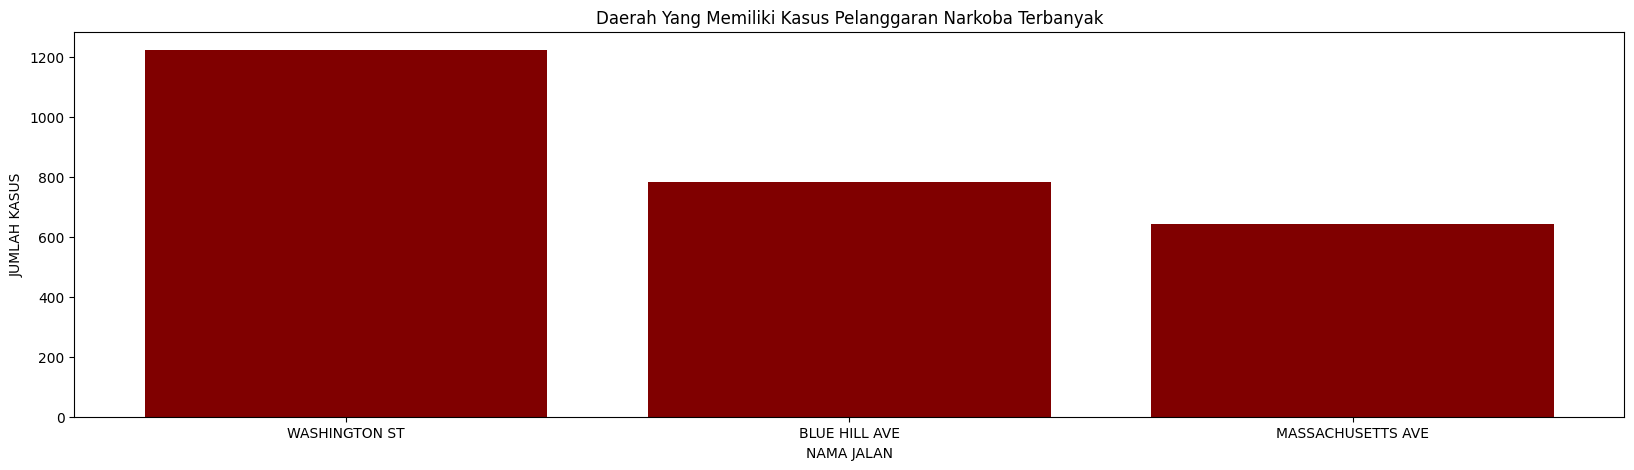

In [55]:
x=data['STREET']
y=data['INCIDENT_NUMBER']
fig = plt.figure(figsize = (20, 5))
 
plt.bar(x, y, color ='maroon')
 
plt.xlabel("NAMA JALAN")
plt.ylabel("JUMLAH KASUS")
plt.title("Daerah Yang Memiliki Kasus Pelanggaran Narkoba Terbanyak")
plt.show()

Setelah diperhatikan pada diagaram diatas, jalan Washington ST memiliki jumlah kasus yang paling banyak diantara jalan lain. Maka, kita akan menggali lebih dalam berapa jumlah kasus pelanggaran narkoba di jalan Washington ST selama 4 tahun.

## Jumlah Kasus Pelanggaran Narkoba di Jalan Washington ST ( 2015 - 2018 )


In [58]:
data = df.loc[(df['OFFENSE_CODE_GROUP']=='Drug Violation') & (df['STREET']=='WASHINGTON ST')].groupby('YEAR').count().sort_values(['INCIDENT_NUMBER'],ascending=False).head(9)
data[['INCIDENT_NUMBER']]

INCIDENT_NUMBER
YEAR                 
2016  374            
2017  311            
2015  270            
2018  267

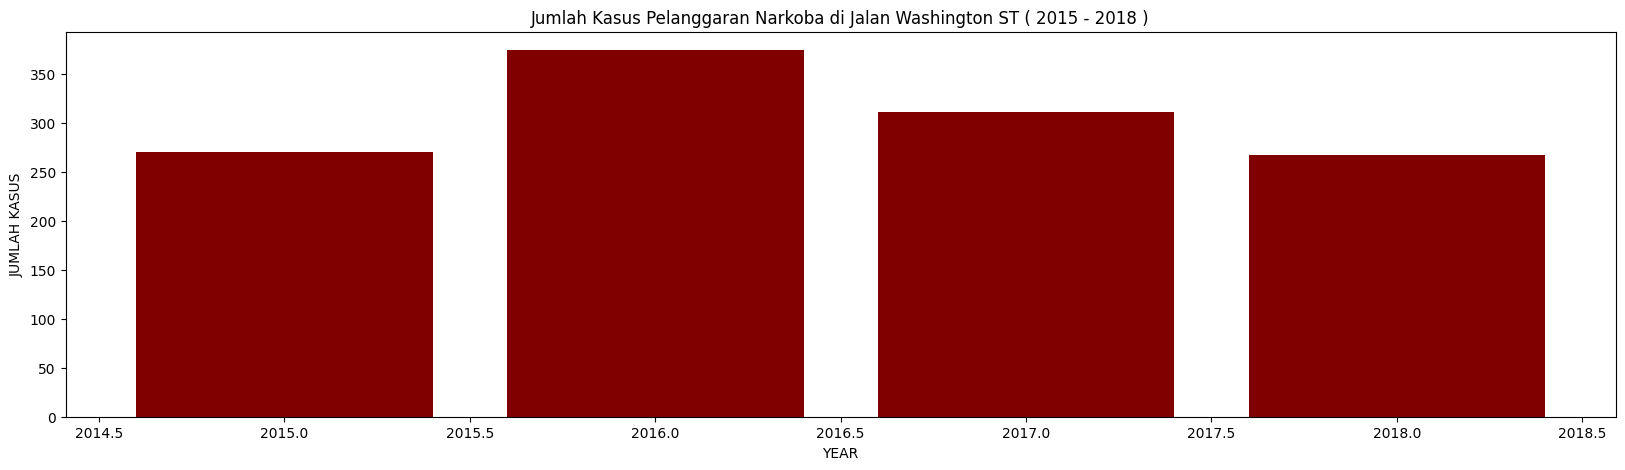

In [61]:
data=data.reset_index()
x=data['YEAR']
y=data['INCIDENT_NUMBER']
fig = plt.figure(figsize = (20, 5))
 
plt.bar(x, y, color ='maroon')
 
plt.xlabel("YEAR")
plt.ylabel("JUMLAH KASUS")
plt.title("Jumlah Kasus Pelanggaran Narkoba di Jalan Washington ST ( 2015 - 2018 )")
plt.show()

# Kesimpulan dan Rekomendasi







## Kesimpulan
Dari analisis yang telah dilakukan, kita bisa membuat beberapa kesimpulan sebagai berikut : 

1. `WASHINGTON ST`, `BLUE HILL AVE` dan `MASSACHUSETTS AVE` menempati 3 peringkat teratas sebagai daerah yang memiliki jumlah kasus pelanggaran narkoba terbanyak di boston.
2. Pada Tahun 2016 angka kasus pelanggaran narkoba khususnya di area `WASHINGTON ST` mengalami peningkatan sebanyak 104 kasus. sekaligus, tahun 2016 adalah tahun kasus pelanggaran narkoba paling tinggi selama 4 periode ( 2015 - 2018 )
3. `DRUGS - SALE/MANUFACTURING` adalah jenis pelanggaran narkoba paling banyak terjadi di jalan `WASHINGTON ST`

## Rekomendasi



1. BPD dapat memperketat keamanan di area `WASHINGTON ST`, `BLUE HILL AVE` dan `MASSACHUSETTS AVE` untuk menekan kasus pelanggaran narkoba
2. BPD dapat melakukan operasi keamanan ke beberapa pabrik obat khususnya di area `WASHINGTON ST` untuk memastikan tidak ada lagi pabrik obat yang memproduksi narkotika
3. BPD dapat melakukan operasi keamanan ke beberapa apotek khususnya di area `WASHINGTON ST` untuk memastikan penjualan obat di area tersebut tidak terlalu bebas.
4. Membuat peraturan untuk setiap apotek khususnya di area `WASHINGTON ST` agar setiap orang yang akan membeli obat dengan dosis yang berat harus disertai dengan resep dokter.




In [42]:
df.to_csv('Drugs_Boston_.csv', encoding='utf-8')

Tableau dapat diakses pada link [di sini](https://public.tableau.com/app/profile/andrian.ashari/viz/Boston_Crime_16806223168730/Story1?publish=yes)